In [25]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from powerlaw import Fit
import collections
import numpy as np
import powerlaw

In [6]:
path = "../data/out.csv"
G = nx.read_edgelist(path, delimiter=',')

```EDA```

In [7]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Average_Clustering_Coefficient = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {Average_Clustering_Coefficient}")

Average_Shortest_Path = nx.average_shortest_path_length(G)
print(f"Average_Shortest_Path: {Average_Shortest_Path}")

Diameter = nx.diameter(G)
print(f"Diameter: {Diameter}")


Number of nodes: 4941
Number of edges: 6594
Average Clustering Coefficient: 0.08010361108159714
Average_Shortest_Path: 18.989185424445708
Diameter: 46


```Degree/Betweenness/Closeness Centrality```

In [8]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

critical_nodes_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]
critical_nodes_betweenness = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:10]
critical_nodes_closeness = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:10]

print(f"Nodes with highest degree centrality: {critical_nodes_degree}")
print(f"Nodes with highest betweeness centrality: {critical_nodes_betweenness}")
print(f"Nodes with highest closeness centrality: {critical_nodes_closeness}")

Nodes with highest degree centrality: ['2847', '602', '932', '3411', '4436', '558', '2287', '2926', '2865', '3930']
Nodes with highest betweeness centrality: ['651', '559', '1365', '2824', '2685', '1324', '1378', '1213', '433', '2781']
Nodes with highest closeness centrality: ['1378', '1678', '2944', '1377', '2781', '1365', '1368', '1380', '2685', '2795']


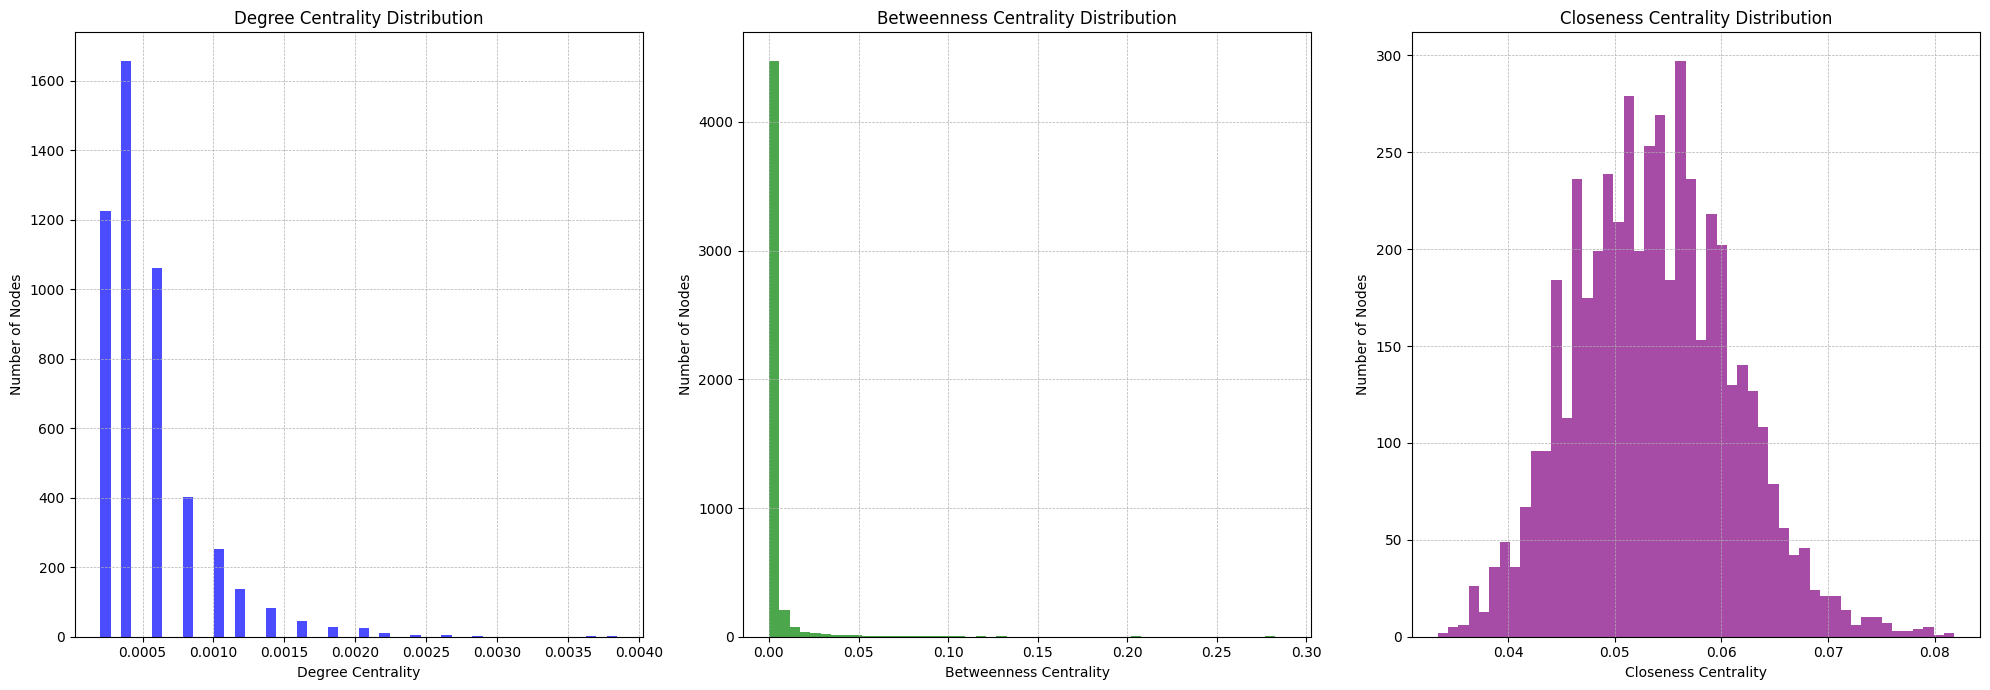

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))
values = list(degree_centrality.values())

# Degree centrality
ax[0].hist(values, bins=50, color='blue', alpha=0.7)
ax[0].set_title("Degree Centrality Distribution")
ax[0].set_xlabel("Degree Centrality")
ax[0].set_ylabel("Number of Nodes")
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Betweenness centrality
ax[1].hist(list(betweenness_centrality.values()), bins=50, color='green', alpha=0.7)
ax[1].set_title("Betweenness Centrality Distribution")
ax[1].set_xlabel("Betweenness Centrality")
ax[1].set_ylabel("Number of Nodes")
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Betweenness centrality
ax[2].hist(list(closeness_centrality.values()), bins=50, color='purple', alpha=0.7)
ax[2].set_title("Closeness Centrality Distribution")
ax[2].set_xlabel("Closeness Centrality")
ax[2].set_ylabel("Number of Nodes")
ax[2].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

```Degree distribution```

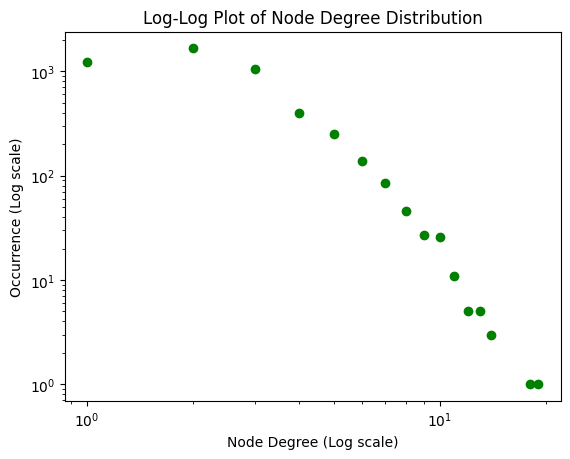

In [13]:
# Gather node degrees from the network into a list
node_degrees = [deg for n, deg in G.degree()]

# Tally the occurrences of each degree in the list
degree_frequency = Counter(node_degrees)
deg_vals, freq_vals = zip(*degree_frequency.items())

# Plot degree distribution using a scatter approach on a log-log scale
plt.scatter(deg_vals, freq_vals, color='green')

# Apply logarithmic scaling to axes for better visualization of power-law distribution
plt.xscale('log')
plt.yscale('log')

# Labeling axes and applying a title to the graph
plt.xlabel('Node Degree (Log scale)')
plt.ylabel('Occurrence (Log scale)')
plt.title('Log-Log Plot of Node Degree Distribution')

# Display the resulting plot
plt.show()


```Normalizing the degree distribution or converting raw frequency counts to probabilities```

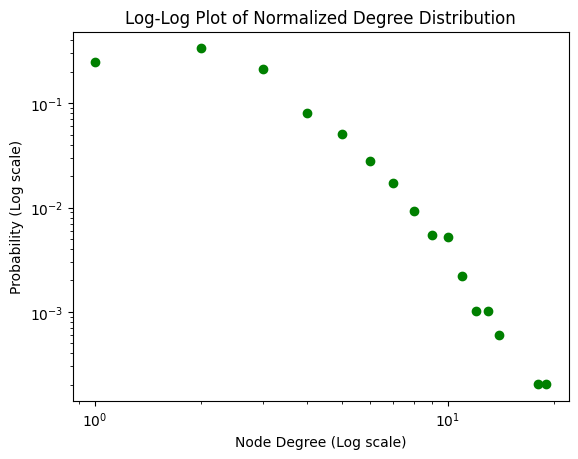

In [14]:
# Gather node degrees from the network into a list
node_degrees = [deg for n, deg in G.degree()]

# Calculate the normalized frequency of each degree value
degree_frequency = Counter(node_degrees)
deg_vals, freq_vals = zip(*degree_frequency.items())

# Normalize frequencies by the total number of nodes to get the probabilities
total_nodes = float(sum(freq_vals))
prob_vals = [f / total_nodes for f in freq_vals]

# Plot the normalized degree distribution on a log-log scale
plt.scatter(deg_vals, prob_vals, color='green')

# Set logarithmic scale for better visualization of power-law distribution
plt.xscale('log')
plt.yscale('log')

# Label the axes and title the plot
plt.xlabel('Node Degree (Log scale)')
plt.ylabel('Probability (Log scale)')
plt.title('Log-Log Plot of Normalized Degree Distribution')

# Display the plot
plt.show()


```Complementary Cumulative Distribution Function (CCDF) of Network Degrees```

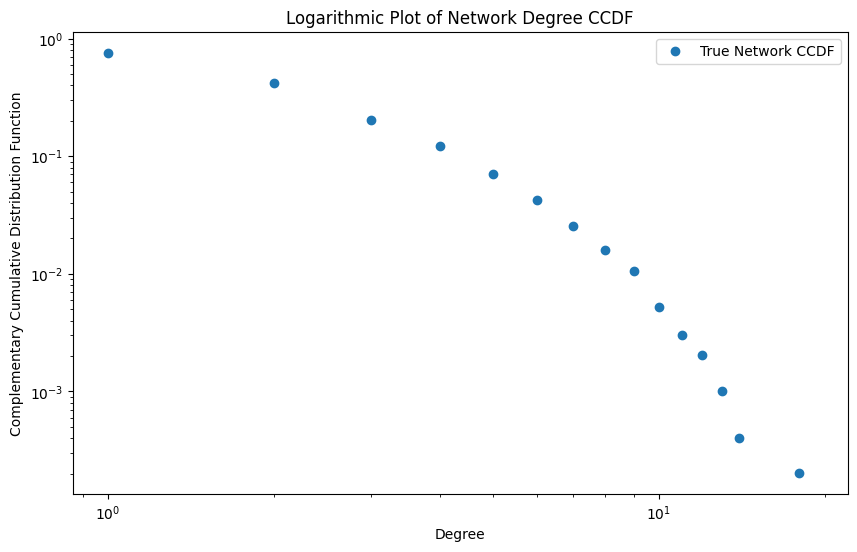

In [22]:
# Define a function to calculate the degree CCDF of a network graph
def calculate_degree_ccdf(net_graph):
    # Extract a descending sorted list of all node degrees in the graph
    deg_seq = sorted((deg for _, deg in net_graph.degree()), reverse=True)
    # Tally the degrees using Counter to get the frequency of each degree
    deg_freq = collections.Counter(deg_seq)
    # Unpack the degrees and their frequencies
    deg_values, freq = zip(*deg_freq.items())
    # Compute the CCDF as one minus the normalized cumulative frequency
    ccdf_vals = 1 - np.cumsum(freq[::-1])[::-1] / net_graph.number_of_nodes()
    return deg_values, ccdf_vals

# Execute the CCDF calculation for the given network graph G
deg_for_G, ccdf_for_G = calculate_degree_ccdf(G)

# Set up the plot with a specific figure size
plt.figure(figsize=(10, 6))
# Plot the CCDF on a log-log scale for visual clarity
plt.loglog(deg_for_G, ccdf_for_G, marker='o', linestyle='none', 
           label='True Network CCDF')
# Titling the plot for Degree CCDF on a logarithmic scale
plt.title('Logarithmic Plot of Network Degree CCDF')
# Labeling the x-axis as Degree
plt.xlabel('Degree')
# Labeling the y-axis as CCDF
plt.ylabel('Complementary Cumulative Distribution Function')
# Adding a legend to the plot for identification
plt.legend()
# Rendering the plot to display
plt.show()



```Power-Law Fit of Network Degree Distribution```


Calculating best minimal value for power law fit


<Axes: >

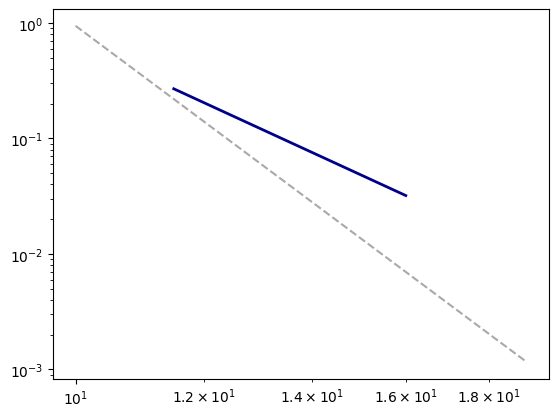

In [17]:
# Arrange node degrees in descending order to prepare for analysis
sorted_degrees = sorted((degree for _, degree in G.degree()), reverse=True)

# Apply power-law fit to the sorted list of degrees
degree_distribution_fit = Fit(sorted_degrees)

# Generate and plot the PDF of the degree distribution
pdf_plot = degree_distribution_fit.plot_pdf(color='darkblue', linewidth=2)

# Overlay the theoretical power-law PDF for comparison
degree_distribution_fit.power_law.plot_pdf(color='darkgrey', linestyle='--', ax=pdf_plot)



```Connected Component Analysis of the Network```


Number of connected components: 1
Sizes of the connected components: [4941]
Number of nodes in the largest component: 4941


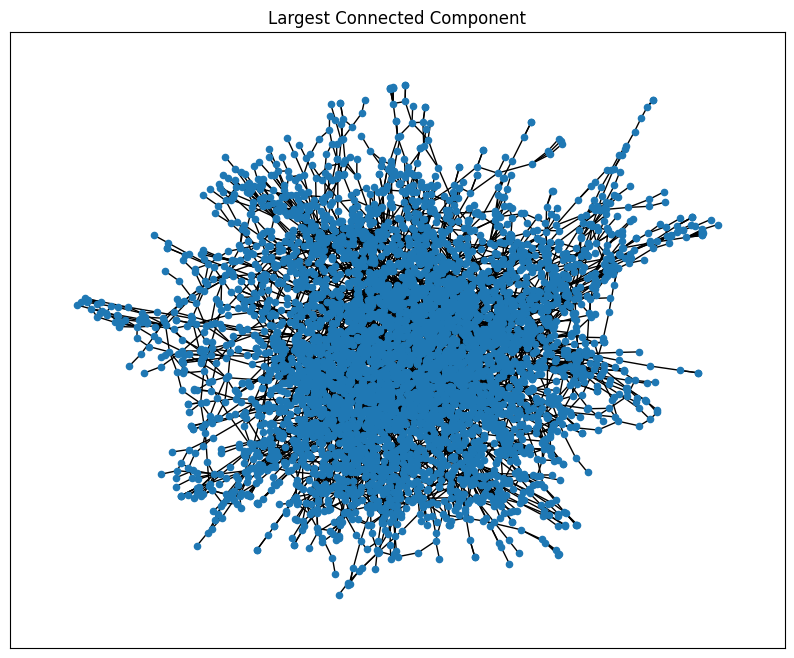

In [23]:
# Calculate the connected components in the graph
connected_components = list(nx.connected_components(G))

# Find the size (number of nodes) of each component
component_sizes = [len(c) for c in connected_components]

# Identify the largest connected component (LCC)
largest_cc = max(connected_components, key=len)
subgraph_lcc = G.subgraph(largest_cc)

# Print some basic stats
print(f"Number of connected components: {len(connected_components)}")
print(f"Sizes of the connected components: {component_sizes}")
print(f"Number of nodes in the largest component: {len(largest_cc)}")

# Visualize the largest connected component
plt.figure(figsize=(10, 8))
nx.draw_networkx(subgraph_lcc, with_labels=False, node_size=20)
plt.title('Largest Connected Component')
plt.show()


# Component Analysis of the Network

Upon conducting a component analysis of the given graph `G`, we have determined the following:

- **Number of Connected Components:** There is precisely one connected component within the network.
- **Sizes of the Connected Components:** The sole connected component encompasses all 4,941 nodes present in the network.
- **Nodes in the Largest Component:** Correspondingly, the largest connected component consists of all 4,941 nodes, affirming the network's cohesion.

## Interpretation

This outcome suggests that our network is entirely connected, which is a typical characteristic of infrastructure networks, such as the power grid this dataset represents. In practical terms, this denotes that there exists a pathway between any two nodes within the network, indicative of the following attributes:

### Robust Connectivity
The presence of a single connected component underscores the robustness of the network's structure. This implies that in the event of a node or edge failure, the network is likely to maintain its operational integrity due to the existence of alternate pathways that can potentially bypass the point of failure.

### Network Resilience
For an infrastructure network like the power grid, having all nodes within a single component is indicative of resilience. It ensures that the entire network can be sustained without fragmentation, even when certain disruptions occur.

### Simplification of Network Analysis
With the network forming a single connected unit, any subsequent network-wide analysis (such as calculating the network diameter or average shortest path length) becomes inherently representative of the entire network. This simplifies both the analysis and interpretation of network characteristics.

### Redundancy and Homogeneity
A single, expansive connected component may also reflect a level of redundancy within the network's connections. Such redundancy is a valuable feature for critical infrastructure networks, providing backup routes for the continuity of service. Furthermore, the homogeneity of the network's structure could be inferred, suggesting uniformity in connectivity across the entire network.

In conclusion, the component analysis substantiates the network's integrity and interconnected nature, which are desirable features for the continued reliability and serviceability of the represented power grid system.


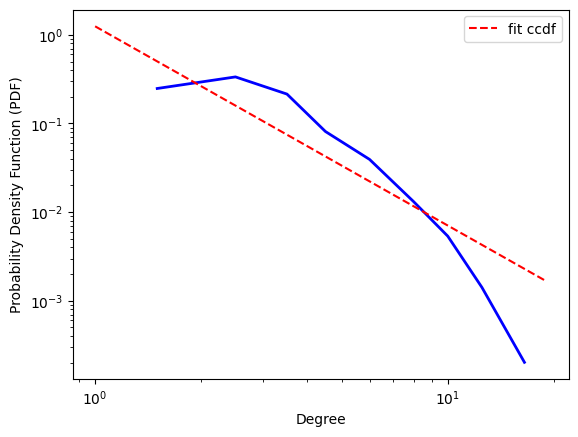

In [30]:
# Calculate the degree of each node and create a list of degrees
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Fit the degree distribution to a power-law distribution
fit = powerlaw.Fit(degree_sequence, xmin=min(degree_sequence))

# Plot the degree distribution and the best fit line
fig = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', label='fit ccdf')

# Add axis labels and a legend
plt.xlabel('Degree')
plt.ylabel('Probability Density Function (PDF)')
plt.legend(loc='upper right')

# Show the plot
plt.show()



In [29]:
# Assume 'data' contains the degree sequence of your network
data = [d for n, d in G.degree()]

# Fit the power-law distribution to data
results = powerlaw.Fit(data)

# The R and p values compare the likelihoods of the data under two distributions.
# The built-in distributions are: power_law, exponential, truncated_power_law, 
# lognormal, and stretched_exponential.

# Compare with exponential distribution
R, p = results.distribution_compare('power_law', 'exponential')
print('Power-law vs Exponential: R =', R, 'p-value =', p)

# Compare with log-normal distribution
R, p = results.distribution_compare('power_law', 'lognormal')
print('Power-law vs Log-normal: R =', R, 'p-value =', p)

# Compare with stretched exponential distribution
R, p = results.distribution_compare('power_law', 'stretched_exponential')
print('Power-law vs Stretched Exponential: R =', R, 'p-value =', p)

# Compare with truncated power-law distribution
R, p = results.distribution_compare('power_law', 'truncated_power_law')
print('Power-law vs Truncated Power-law: R =', R, 'p-value =', p)

Calculating best minimal value for power law fit
Power-law vs Exponential: R = 3.072977110353444 p-value = 0.011405961612904674
Power-law vs Log-normal: R = -0.8762939990788111 p-value = 0.2241458437962467
Power-law vs Stretched Exponential: R = 0.7819433627672343 p-value = 0.015292826367684916
Power-law vs Truncated Power-law: R = 1.1811840773243154e-05 p-value = 0.9961219612764489


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions


```Log-Normal Distribution Fit to Network Degree Distribution```

Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


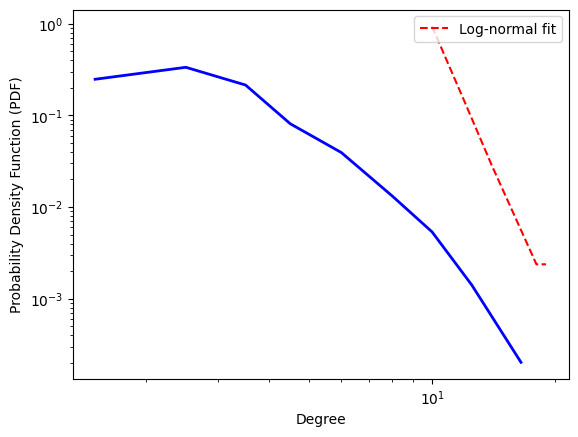

In [31]:

# Calculate the degree sequence
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

# Fit the degree distribution to a power-law distribution for comparison
fit = powerlaw.Fit(degree_sequence, xmin=min(degree_sequence))

# Fit the degree distribution to a log-normal distribution
lognormal_fit = powerlaw.Fit(degree_sequence, distribution='lognormal')

# Plot the probability density function (PDF) of the empirical data
fig_pdf = fit.plot_pdf(color='b', linewidth=2)

# Overlay the PDF of the best-fit log-normal model
lognormal_fit.lognormal.plot_pdf(color='r', linestyle='--', ax=fig_pdf, label='Log-normal fit')

# Add axis labels and a legend
plt.xlabel('Degree')
plt.ylabel('Probability Density Function (PDF)')
plt.legend(loc='upper right')

# Show the plot
plt.show()


```Truncated Power-Law Fit of the Network Degree Distribution```


Calculating best minimal value for power law fit


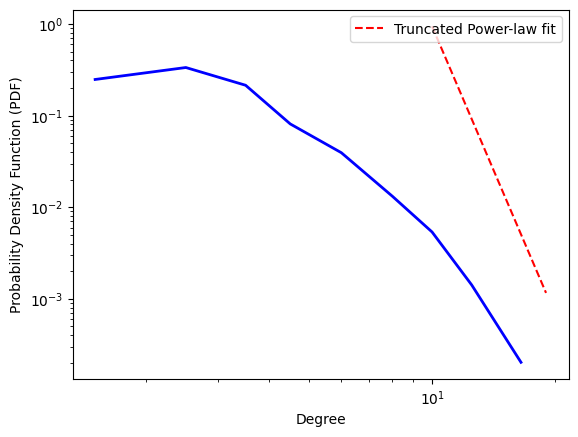

In [33]:

# Calculate the degree sequence
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

# Fit the degree distribution to a power-law distribution for baseline comparison
fit = powerlaw.Fit(degree_sequence, xmin=min(degree_sequence))

# Fit the degree distribution to a truncated power-law distribution
truncated_powerlaw_fit = powerlaw.Fit(degree_sequence, distribution='truncated_power_law')

# Plot the probability density function (PDF) of the empirical data
fig_pdf = fit.plot_pdf(color='b', linewidth=2)

# Overlay the PDF of the best-fit truncated power-law model
truncated_powerlaw_fit.truncated_power_law.plot_pdf(color='r', linestyle='--', ax=fig_pdf, label='Truncated Power-law fit')

# Add axis labels and a legend
plt.xlabel('Degree')
plt.ylabel('Probability Density Function (PDF)')
plt.legend(loc='upper right')

# Show the plot
plt.show()

```Simulating Attacks or Failures```